In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Definição da "semente" para rodar os testes
np.random.seed(42)

# Definição da quantidade de amostras (linhas) do dataframe
n_amostras = 1000

# Geração dos dados
dados = {
    # Gera números inteiros entre 18 e 75
    'idade': np.random.randint(18, 76, n_amostras),

    # Gera números decimais entre 1500 e 15000
    'renda_mensal': np.random.uniform(1500.00, 15000.00, n_amostras).round(2),

    # Gera números inteiros entre 0 e 1000
    'score_serasa': np.random.randint(0, 1001, n_amostras),

    # Escolhe aleatoarimente entre 0 e 1 (0 - Não possui dívida | 1 - Possui dívida)
    'tem_divida_ativa': np.random.choice([0, 1], size=n_amostras, p=[0.7, 0.3])
}

# Criação do dataframe
df_credito = pd.DataFrame(dados)

# Definição de uma regra para aprovação
def regra_aprovacao(row):
    # Caso tenha dívida ou score baixo, reprova
    resultado = 1
    if row['tem_divida_ativa'] == 1:
        resultado = 0
    if row['score_serasa'] < 400:
        resultado = 0

    # Definição de uma variável para simular erro humano
    chance_erro = np.random.random() # Gera um número aleatório entre 0.0 e 1.0

    # Caso o número gerado for menor que 0.05, a decisão do resultado (aprovado ou reprovado) é invertida
    if chance_erro < 0.05:
        resultado = 1 - resultado

    return resultado

# Aplicação da regra
df_credito['aprovado'] = df_credito.apply(regra_aprovacao, axis=1)


In [3]:
# Separação das variáveis independentes (todas as colunas exceto "aprovado")
X = df_credito.drop('aprovado', axis=1)

# Variável alvo (dependente)
y = df_credito['aprovado']

# Divisão dos dados em conjunto de treino e conjunto de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Criação do modelo de árvore de decisão
modelo = DecisionTreeClassifier()

# Treino do modelo com os dados de treino
modelo.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_teste)

# Cálculo da precisão do modelo
precisao = accuracy_score(y_teste, previsoes)

# Avaliação do modelo
if precisao < 0.6:
    print(f'\nPrecisão: {precisao}\nPrecisão abaixo do esperado!')
else:
    print(f'\nPrecisão: {precisao}\nPrecisão esperada alcançada!')



Precisão: 0.9
Precisão esperada alcançada!


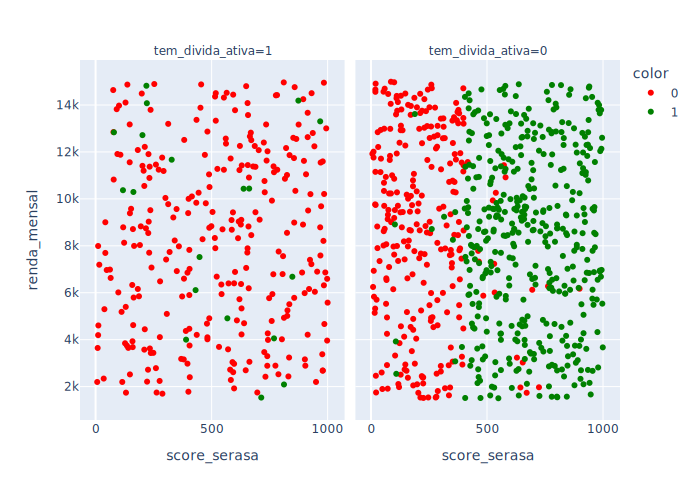

In [4]:
# Mudança da renderização do plotly para svg no notebook (a fim de visualização no github)
pio.renderers.default = "svg" # Comente esta linha para exibição do gráfico interativo

# Geração de um gráfico para análise dos dados e suas correlações, além da verificação de erros
fig = px.scatter(
    df_credito,
    x = 'score_serasa',
    y = 'renda_mensal',
    color = df_credito['aprovado'].astype(str),
    facet_col = 'tem_divida_ativa',
    color_discrete_map={'0': 'red', '1': 'green'}
)

# Exibição do gráfico
fig.show()